<a href="https://colab.research.google.com/github/bdemchak/bdemchak.github.io/blob/master/Sanity_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#Startup: Establish link to Google Drive
**You'll be prompted for a credential, and the prompt will have instructions for getting it. Once you enter it, Google Drive files will be available as '/gdrive/My Drive/xxx' where 'xxx is a file name or path with your Google Drive.**

This workflow assumes the following in the Google Drive folder called "data":

* galFiltered.sif
* Affinity Purification.cys
* All Predicates.filter
* folder called "output"



Source for this method: https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/

You can examine the Google Drive on your own by adding this to a cell:

!ls "/gdrive/My Drive/data"

The Google Drive API is documented [here](https://developers.google.com/drive/api/v3/about-sdk).




In [2]:
from google.colab import drive
drive.mount('/gdrive')
DATA_DIR = '/gdrive/My Drive/data/'
OUTPUT_DIR = DATA_DIR + 'output/'
print('Successfully mounted Google drive')

Mounted at /gdrive
Successfully mounted Google drive


---
#Startup: Fetch latest py4cytoscape
**Note that you can fetch from a specific github branch by adding "@\<branch>" to the "py4cytocape" at the end of the github URL.**

For example, to get branch 0.0.5: git+https://github.com/cytoscape/py4cytoscape@0.0.5



In [3]:
!pip uninstall -y py4cytoscape

#!pip install py4cytoscape
!pip install git+https://github.com/cytoscape/py4cytoscape@0.0.9
#!pip install git+https://github.com/cytoscape/py4cytoscape

  Cloning https://github.com/cytoscape/py4cytoscape (to revision 0.0.9) to /tmp/pip-req-build-daeg_nb6
  Running command git clone -q https://github.com/cytoscape/py4cytoscape /tmp/pip-req-build-daeg_nb6
  Running command git checkout -b 0.0.9 --track origin/0.0.9
  Switched to a new branch '0.0.9'
  Branch '0.0.9' set up to track remote branch '0.0.9' from 'origin'.
     |████████████████████████████████| 3.2MB 8.8MB/s 
  Created wheel for py4cytoscape: filename=py4cytoscape-0.0.9-cp37-none-any.whl size=156266 sha256=2eac614341948698c11c430f7341dec0110f9370e394ecef638fb603c32f5f3c
  Stored in directory: /tmp/pip-ephem-wheel-cache-b0kc7_lr/wheels/59/46/c2/a0aec2c0ac4c6c13dc3db0a92c9461235c144070fb50df0c0e
Successfully built py4cytoscape


---
#Startup: Set up Cytoscape connection


In [4]:
import IPython
import py4cytoscape as p4c
print(f'Loading Javascript client ... {p4c.get_browser_client_channel()} on {p4c.get_jupyter_bridge_url()}')
browser_client_js = p4c.get_browser_client_js()
IPython.display.Javascript(browser_client_js) # Start browser client


Loading Javascript client ... f080df57-5de7-4383-8283-6324d1eb1b39 on https://jupyter-bridge.cytoscape.org


<IPython.core.display.Javascript object>

---
# Sanity test: Cytoscape version


In [22]:
p4c.cytoscape_version_info()


{'apiVersion': 'v1',
 'automationAPIVersion': '1.2.0',
 'cytoscapeVersion': '3.9.0-SNAPSHOT',
 'jupyterBridgeVersion': '0.0.2',
 'py4cytoscapeVersion': '0.0.9'}

---
# Sanity test: Cytoscape's sandbox path

**Sandboxing is explained in https://py4cytoscape.readthedocs.io/en/latest/concepts.html#sandboxing**

In [23]:
p4c.sandbox_get_file_info('.')

{'filePath': 'C:\\Users\\CyDeveloper\\CytoscapeConfiguration\\filetransfer\\default_sandbox',
 'isFile': False,
 'modifiedTime': '2021-06-03 16:03:41.0391'}

---
#Demo: Load standard Cytoscape sample session

assert() checks verify that function result was plausible

In [24]:
assert(p4c.open_session() == {})
assert(p4c.get_network_count() == 1)
assert(p4c.get_network_name() == 'galFiltered.sif')
print('Successfully opened sample session')

Opening sampleData/sessions/Yeast Perturbation.cys...
Successfully opened sample session


---
# Demo: Download and load my session

**This is a big session, so loading it may take a minute to download it to the sandbox and then load it into Cytoscape.**

assert() checks verify that function result was plausible

In [25]:
p4c.sandbox_send_to(DATA_DIR + 'Affinity Purification.cys')
print('Successfully downloaded session ... beginning session load ...')
assert(p4c.open_session('Affinity Purification.cys') == {})
assert(p4c.get_network_count() == 1)
assert(p4c.get_network_name() == 'HIV-human PPI')
print('Successfully opened Affinity Purification.cys')

Successfully downloaded session ... beginning session load ...
Opening C:\Users\CyDeveloper\CytoscapeConfiguration\filetransfer\default_sandbox/Affinity Purification.cys...
Successfully opened Affinity Purification.cys


---
#Demo: Load standard Cytoscape sample network

assert() checks verify that function result was plausible

In [26]:
res = p4c.import_network_from_file()
assert(type(res['networks']) is list)
assert(len(res['networks']) == 1)
assert(type(res['views']) is list)
assert(len(res['views']) == 1)
print('Successfully loaded sample network')

Successfully loaded sample network


---
#Demo: Download and load my network

assert() checks verify that function result was plausible

In [27]:
p4c.sandbox_send_to(DATA_DIR + 'galFiltered.sif')
res = p4c.import_network_from_file('galFiltered.sif')
assert(type(res['networks']) is list)
assert(len(res['networks']) == 1)
assert(type(res['views']) is list)
assert(len(res['views']) == 1)
print('Successfully loaded network galFiltered.sif')

Successfully loaded network galFiltered.sif


---
#Demo: Save session and upload to Google Drive

This is a big file, so it may take a while for Cytoscape to save it, and then another while to upload it.

assert() checks verify that function result was plausible

In [28]:
res = p4c.save_session('Three network session')
assert(type(res) is dict)
assert(res == {})
print("Successfully saved network ... transferring network to Notebook server now ...")
p4c.sandbox_get_from('Three network session.cys', OUTPUT_DIR + 'Three network session.cys')

This file has been overwritten.
Successfully saved network ... transferring network to Notebook server now ...


{'fileByteCount': 3509386,
 'filePath': 'C:\\Users\\CyDeveloper\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\Three network session.cys',
 'modifiedTime': '2021-06-03 16:07:34.0856'}

---
#Demo: Save network and upload
assert() checks verify that function result was plausible

In [29]:
p4c.sandbox_remove_file('HIV-human PPI.sif')
res = p4c.export_network(filename='HIV-human PPI.sif', network='HIV-human PPI', type='sif')
assert(type(res) is dict)
assert('file' in res)
print('Successfully saved HIV-human PPI')
p4c.sandbox_get_from('HIV-human PPI.sif', OUTPUT_DIR + 'HIV-human PPI.sif')

Successfully saved HIV-human PPI


{'fileByteCount': 7181,
 'filePath': 'C:\\Users\\CyDeveloper\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\HIV-human PPI.sif',
 'modifiedTime': '2021-06-03 16:07:54.0189'}

---
#Demo: Save visual styles and upload to Google Drive

assert() checks verify that function result was plausbile

In [31]:
res = p4c.export_visual_styles(overwrite_file=True)
assert(type(res) is dict)
assert('file' in res)
print('Successfully saved default visual styles file')
p4c.sandbox_get_from('styles.xml', OUTPUT_DIR + 'styles.xml')

In commands_post(): Unable to delete file: C:\Users\CyDeveloper\CytoscapeConfiguration\filetransfer\default_sandbox\styles.xml


CyError: ignored

---
#Demo: Save visual styles and upload to Google Drive (alternate)

assert() checks verify that function result was plausible

In [20]:
res = p4c.export_visual_styles(filename='mystyles', type='json')
assert(type(res) is dict)
assert('file' in res)
print('Successfully saved mystyles.json styles file')
p4c.sandbox_get_from('mystyles.json', OUTPUT_DIR + 'mystyles.json')

In commands_post(): Uncaught exception while processing resource [qtp1138106641-1701]: Receiver class org.cytoscape.io.internal.write.json.CytoscapeJsVisualStyleWriterFactory does not define or inherit an implementation of the resolved method 'abstract org.cytoscape.io.write.CyWriter createWriter(java.io.OutputStream, java.util.Set, java.util.Set)' of interface org.cytoscape.io.write.VizmapWriterFactory.


CyError: ignored

---
#Demo: Download and load visual styles file

assert() checks verify that function result was plausible

In [ ]:
p4c.sandbox_remove_file('styles.xml')
p4c.sandbox_send_to(OUTPUT_DIR + 'styles.xml')
res = p4c.import_visual_styles()
assert(type(res) is list)
assert(len(res) == 1)
print('Successfully loaded from default styles file: ' + str(res))

---
#Demo: Download and load visual styles file (alternate)

assert() checks verify that function result was plausible

In [21]:
p4c.sandbox_remove_file('custom.xml')
p4c.sandbox_send_to(OUTPUT_DIR + 'styles.xml', 'custom.xml')
res = p4c.import_visual_styles(filename='custom.xml')
assert(type(res) is list)
assert(len(res) == 1)
print('Successfully loaded from custom styles file: ' + str(res))

Successfully loaded from custom styles file: ['PSIMI 25 Style']


---
#Demo: Export network image and upload to Google Drive

assert() checks verify that function result was plausible



Successfully exported HIV-human PPI network


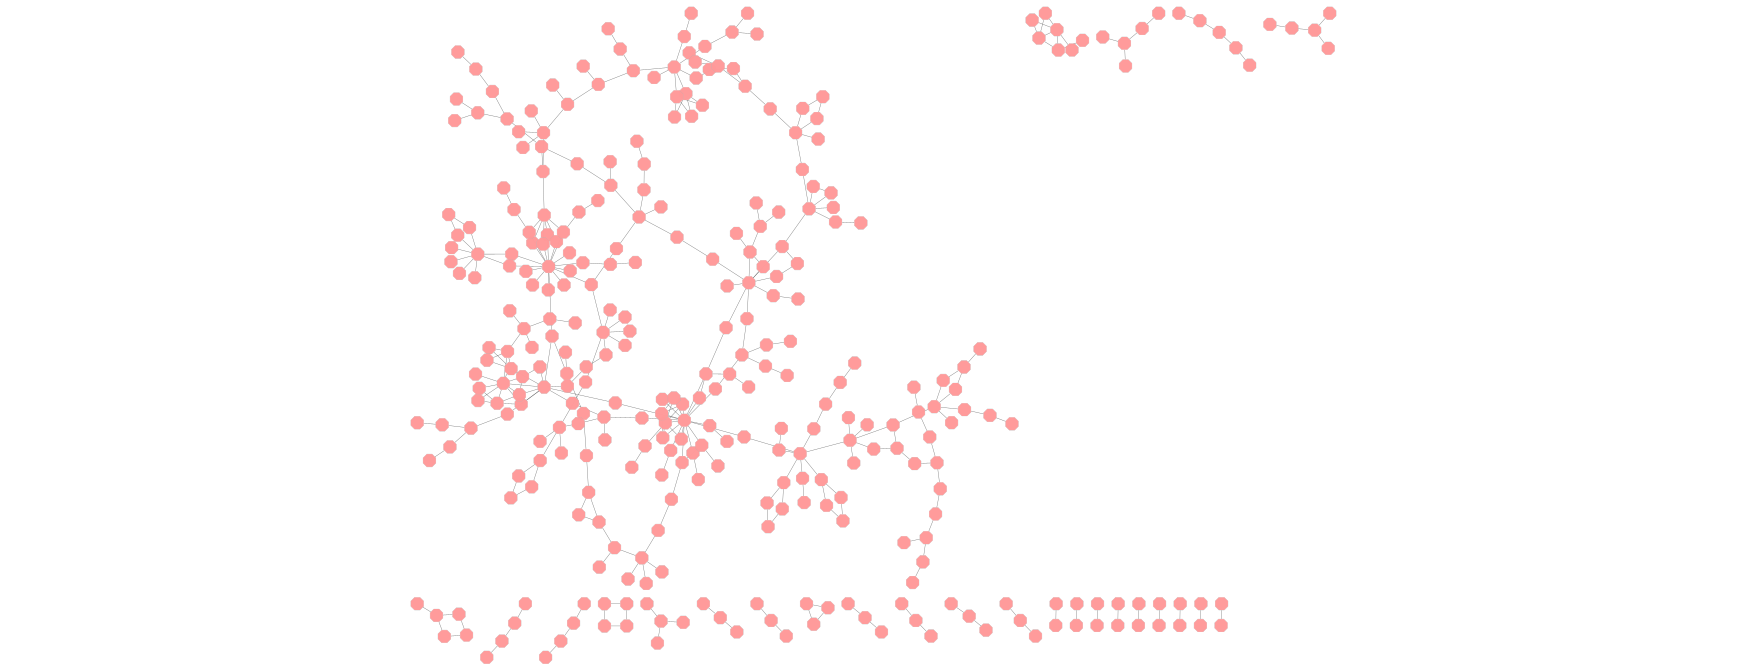

In [32]:
from IPython.display import Image

p4c.sandbox_remove_file('HIV-human PPI.png')
res = p4c.export_image('HIV-human PPI')
assert(type(res) is dict)
assert('file' in res)
print('Successfully exported HIV-human PPI network')
p4c.sandbox_get_from('HIV-human PPI.png', OUTPUT_DIR + 'HIV-human PPI.png')
Image(filename=OUTPUT_DIR + 'HIV-human PPI.png')


---
#Demo: Export filters and upload to Google Drive

assert() checks verify that function result was plausible

In [33]:
p4c.sandbox_remove_file('filters.json')
res = p4c.export_filters()
assert(type(res) is list)
assert(len(res) == 0)
print('Successfully exported filters to filters.json')
p4c.sandbox_get_from('filters.json', OUTPUT_DIR + 'filters.json')


Successfully exported filters to filters.json


{'fileByteCount': 758,
 'filePath': 'C:\\Users\\CyDeveloper\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\filters.json',
 'modifiedTime': '2021-06-03 16:09:46.0200'}

---
#Demo: Download and load custom filters

Note that these custom filters don't match the network they're loaded into. They won't do much.

assert() checks verify that function result was plausible

In [35]:
p4c.sandbox_remove_file('All Predicates.filter')
p4c.sandbox_send_to(DATA_DIR + 'All Predicates.filter')
res = p4c.import_filters(filename='All Predicates.filter')
assert(type(res) is list)
assert(len(res) == 0)
print('Successfully loaded from custom filters file')

Successfully loaded from custom filters file


#App: Create networks, calculate clusters, and show subnetworks

---
##App Part 1: Load sample session and calculate edges
**Note that this uses the Cytoscape session already loaded into the Cytoscape sandbox by default.**

The output will be a dataframe that shows the network's edges.

In [40]:
 import uuid
 import re
 import pandas as df
 import time


 p4c.open_session('sampleData/sessions/Affinity Purification.cys')
 edges = p4c.get_all_edges()
 sources = [re.match('(\S*) \(.*\) (\S*)', edge).group(1)   for edge in edges]
 targets = [re.match('(\S*) \(.*\) (\S*)', edge).group(2)   for edge in edges]
 edge_data = {'source': sources, 'target': targets}

 edges_frame = df.DataFrame(data=edge_data, columns=['source', 'target'])
 edges_frame

Opening C:\Users\CyDeveloper\CytoscapeConfiguration\filetransfer\default_sandbox/sampleData/sessions/Affinity Purification.cys...


,source,target
0,VPR,P43243
1,VPR,O00217
2,VPR,Q8IZ07
3,Q07065,Q07065
4,VPR,Q2PZI1
...,...,...
1212,VPR,O75179
1213,VPR,P21964
1214,VPR,O14929
1215,Q8N163,P33993


---
##App Part 2: Create a fresh network out of just the edges

The time reported should be less than 30s.

In [41]:
network_name = uuid.uuid4().hex
start_create = time.monotonic()
network_suid = p4c.networks.create_network_from_data_frames(edges=edges_frame, title=network_name, collection=network_name + '_collection')
print(f'create took {(time.monotonic() - start_create):10.2f} seconds')

Applying default style...
Applying preferred layout
create took      18.16 seconds


---
## App Part 3: Call MCODE to calculate clusters

**Note that py4cytoscape doesn't have a function that calls MCODE. Instead, we use the commands_post technique documented here: https://py4cytoscape.readthedocs.io/en/latest/concepts.html#calling-cytoscape-apps**

The output is a list of clusters that have more than 3 nodes.

Note that you must have MCODE app installed in Cytoscape for this to work.

In [42]:
start_mcode = time.monotonic()
mcode = p4c.commands.commands_post('mcode cluster degreeCutoff=2 fluff=false fluffNodeDensityCutoff=0.1 haircut=true includeLoops=false kCore=2 maxDepthFromStart=100 network=current nodeScoreCutoff=0.2 scope=NETWORK')
print(f'mcode took {(time.monotonic() - start_mcode):10.2f} seconds')

big_clusters = [i for i in range(len(mcode['clusters'])) if len(mcode['clusters'][i]['nodes']) > 3]
big_clusters

mcode took       1.59 seconds


[0, 1, 2, 3, 4, 11]

---
## App Part 4: Image each cluster and upload
**At the end of this cell, all .png images are displayed.**

Because the .png is created in the Cytoscape sandbox, it must be uploaded to this Notebook's file system before it can be viewed.

There is a call to get_table_columns() that is never used, but it sure takes a while. It's here just to show that Cytoscape can be called for a long operation.

0 view took       1.78 seconds
0 append took       4.46 seconds
0 export took       3.23 seconds
1 view took       1.17 seconds
1 append took       4.37 seconds
1 export took       2.69 seconds
2 view took       0.97 seconds
2 append took       4.47 seconds
2 export took       2.59 seconds
3 view took       1.07 seconds
3 append took       4.36 seconds
3 export took       2.40 seconds
4 view took       0.98 seconds
4 append took       4.67 seconds
4 export took       2.45 seconds
5 view took       0.97 seconds
5 append took       4.46 seconds
5 export took       2.36 seconds


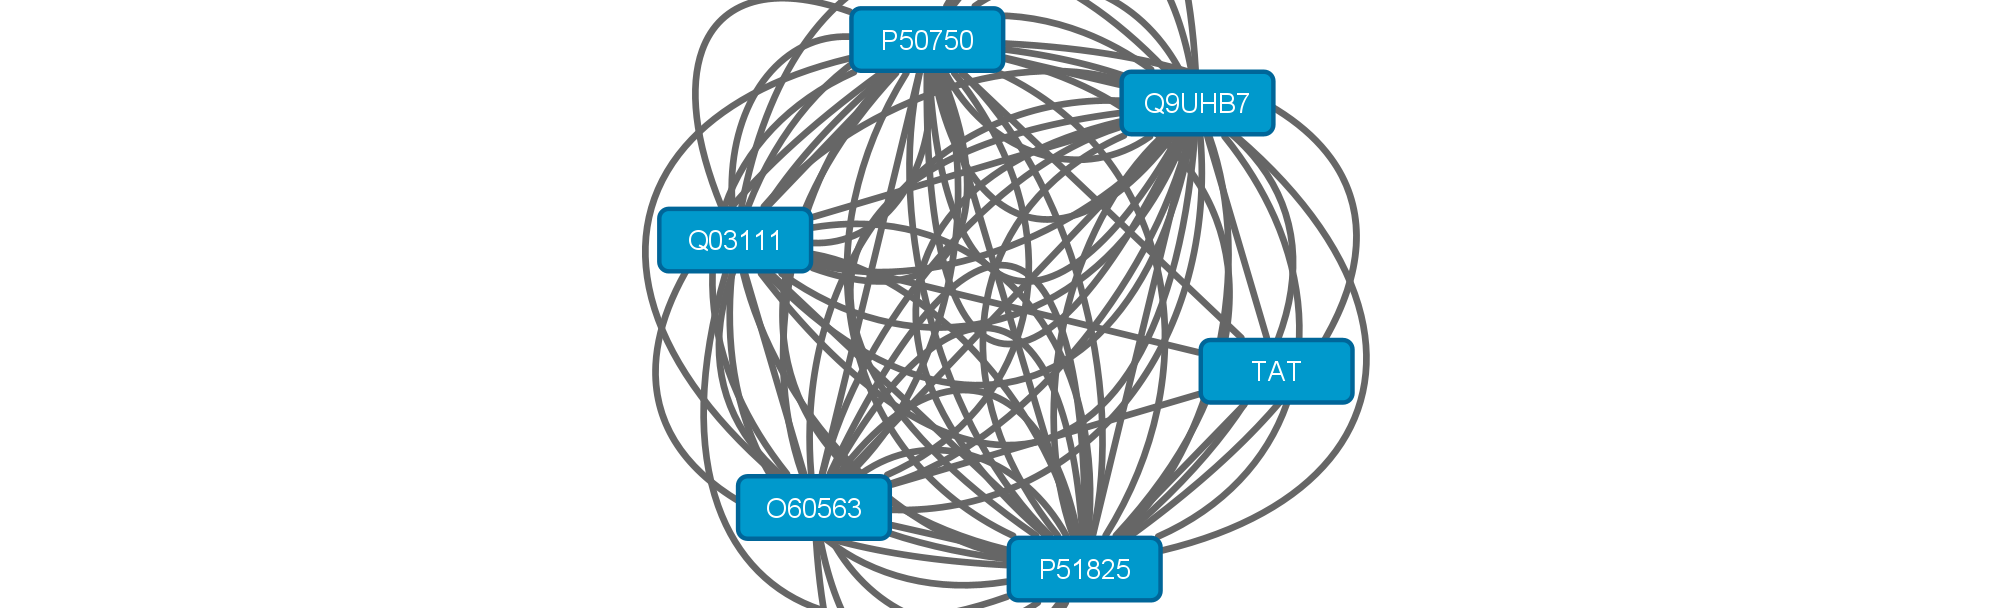

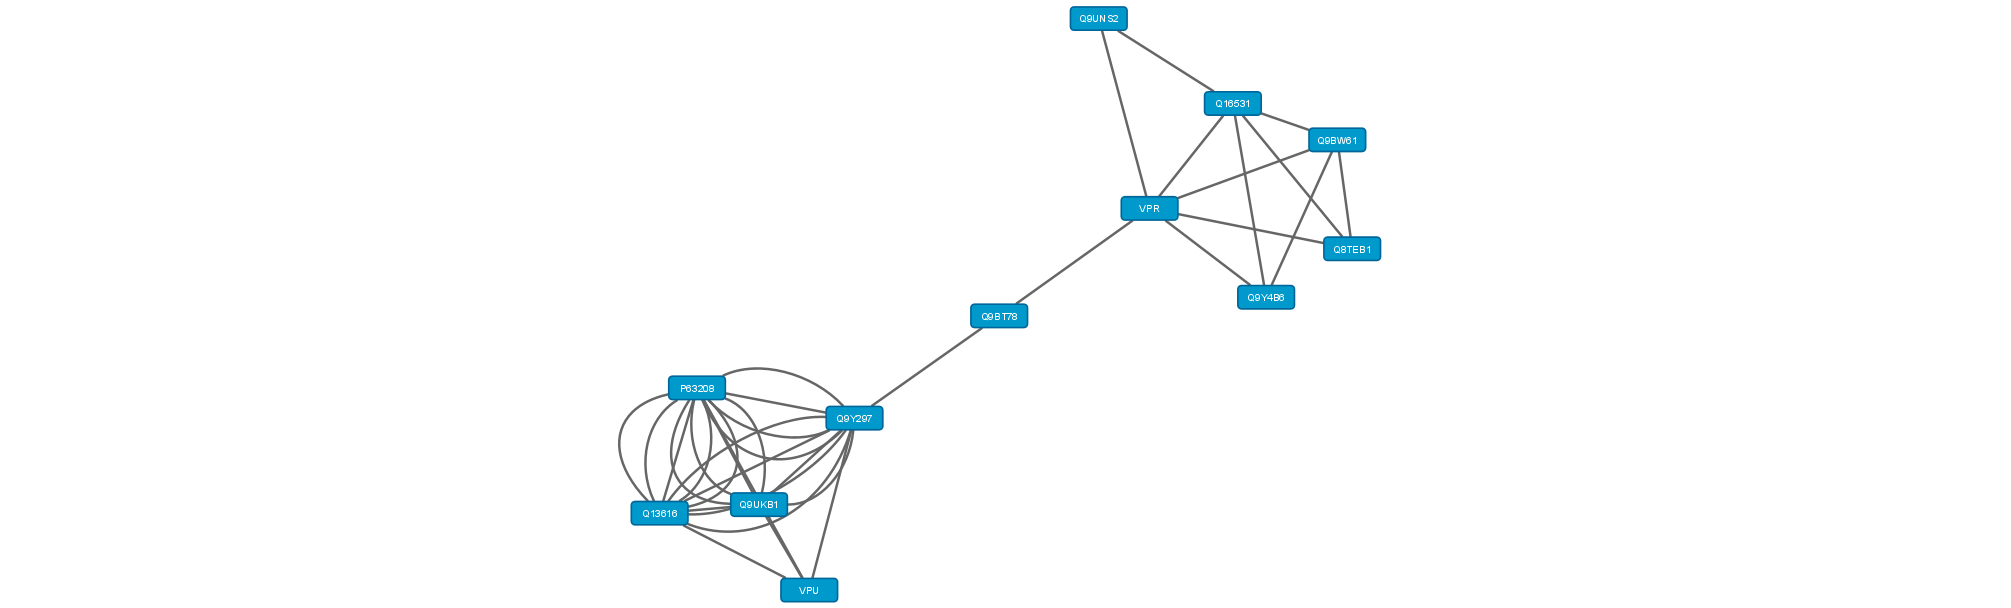

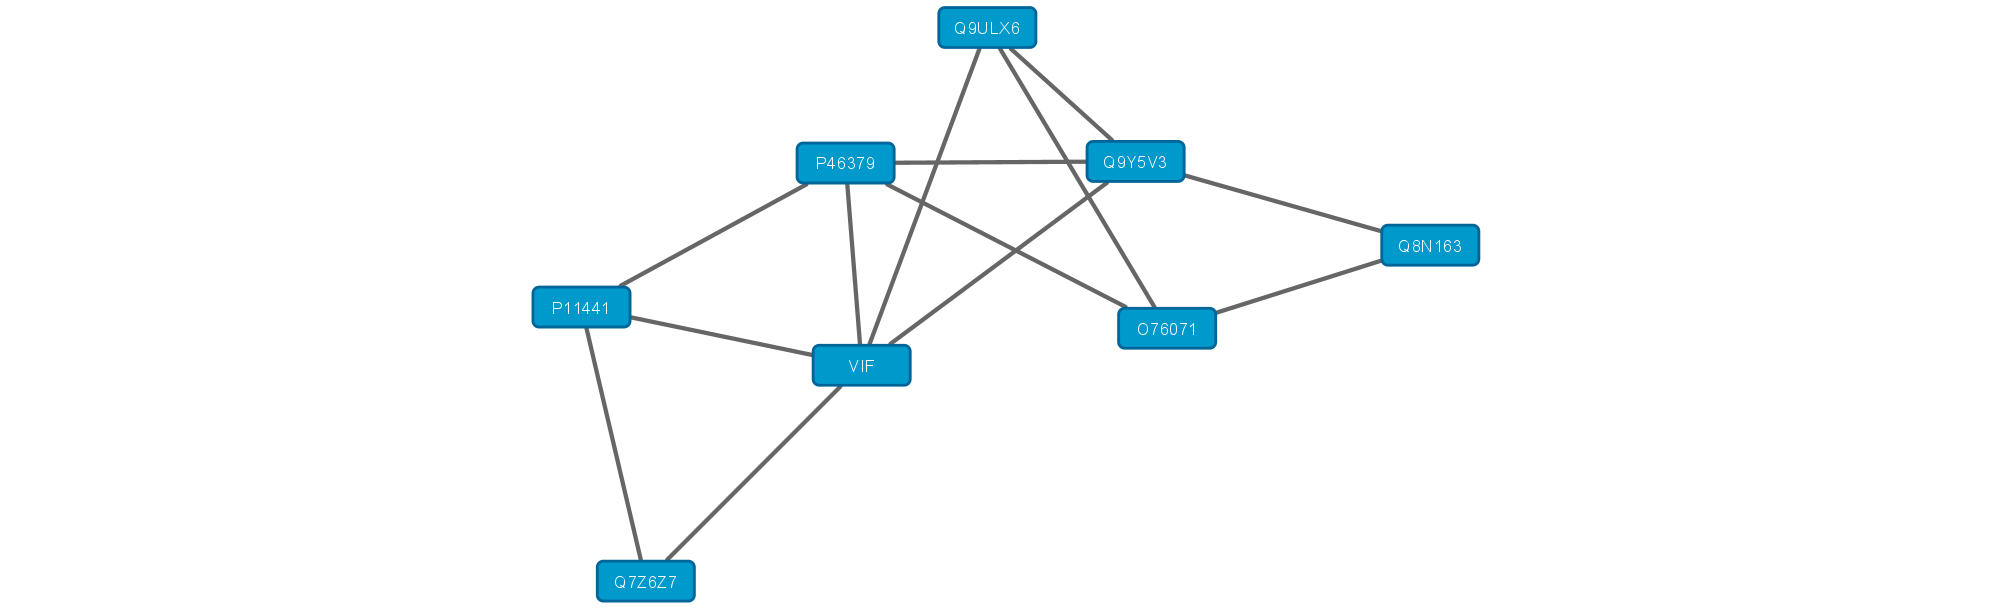

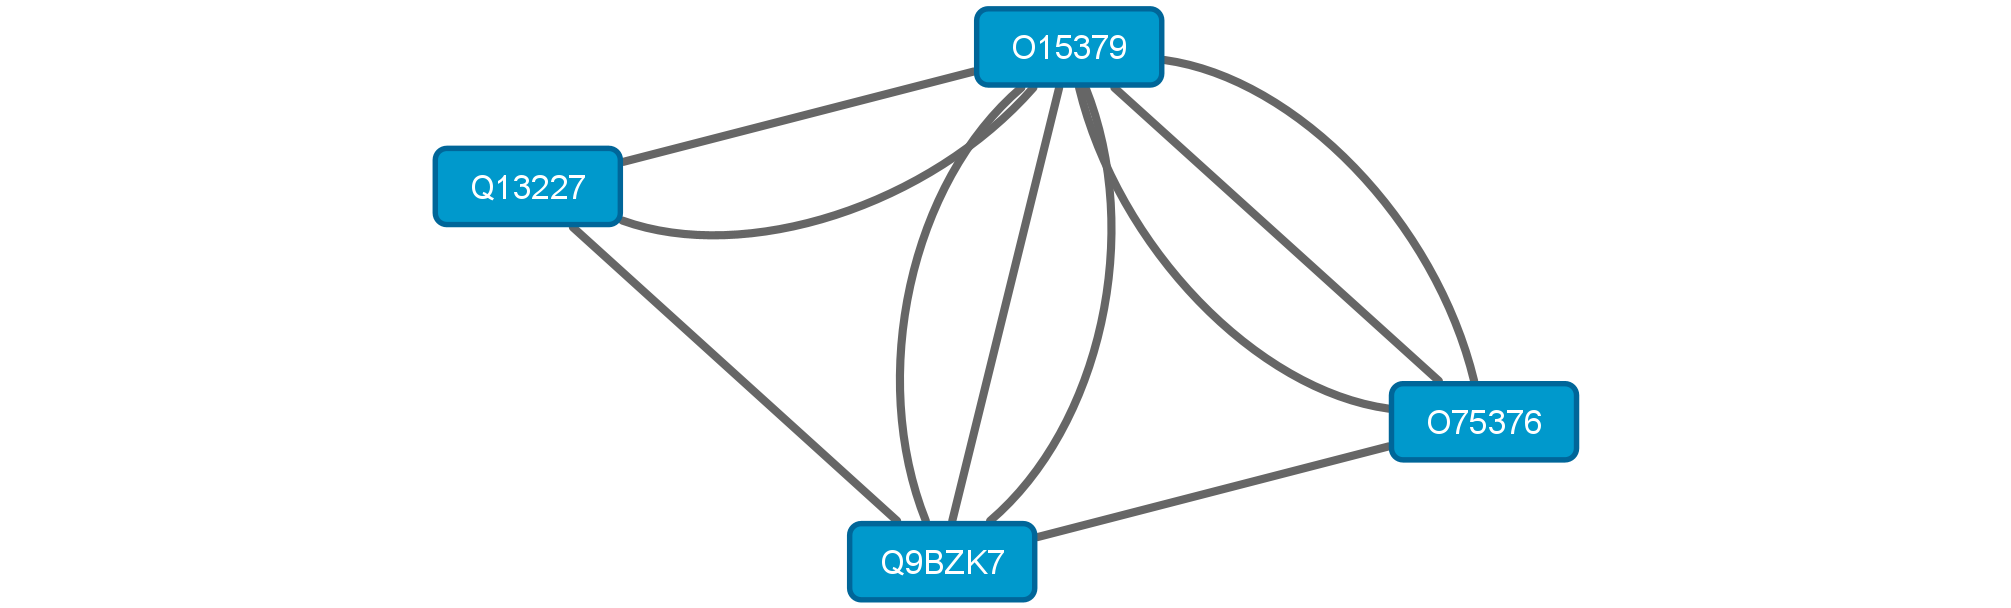

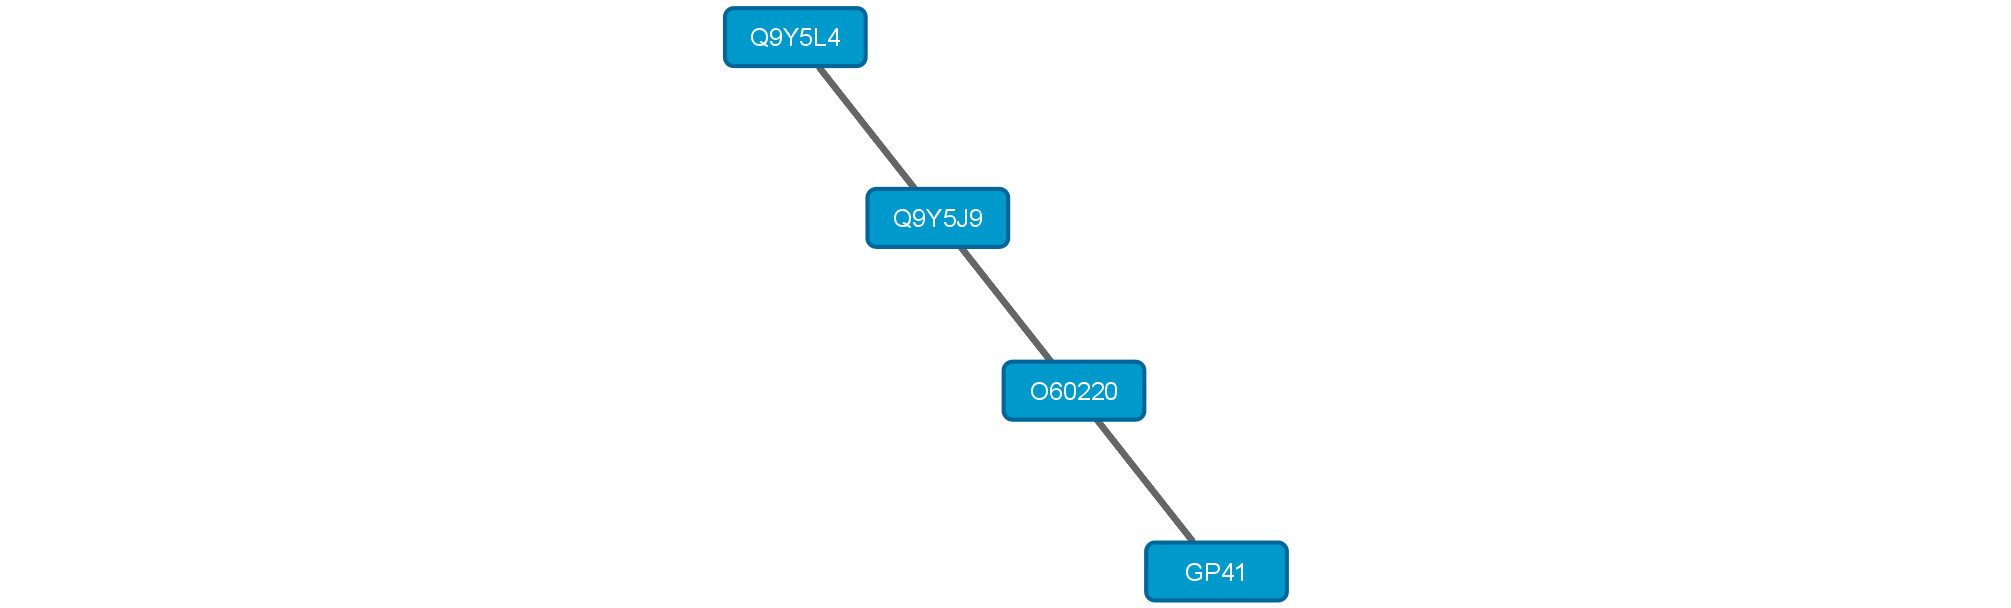

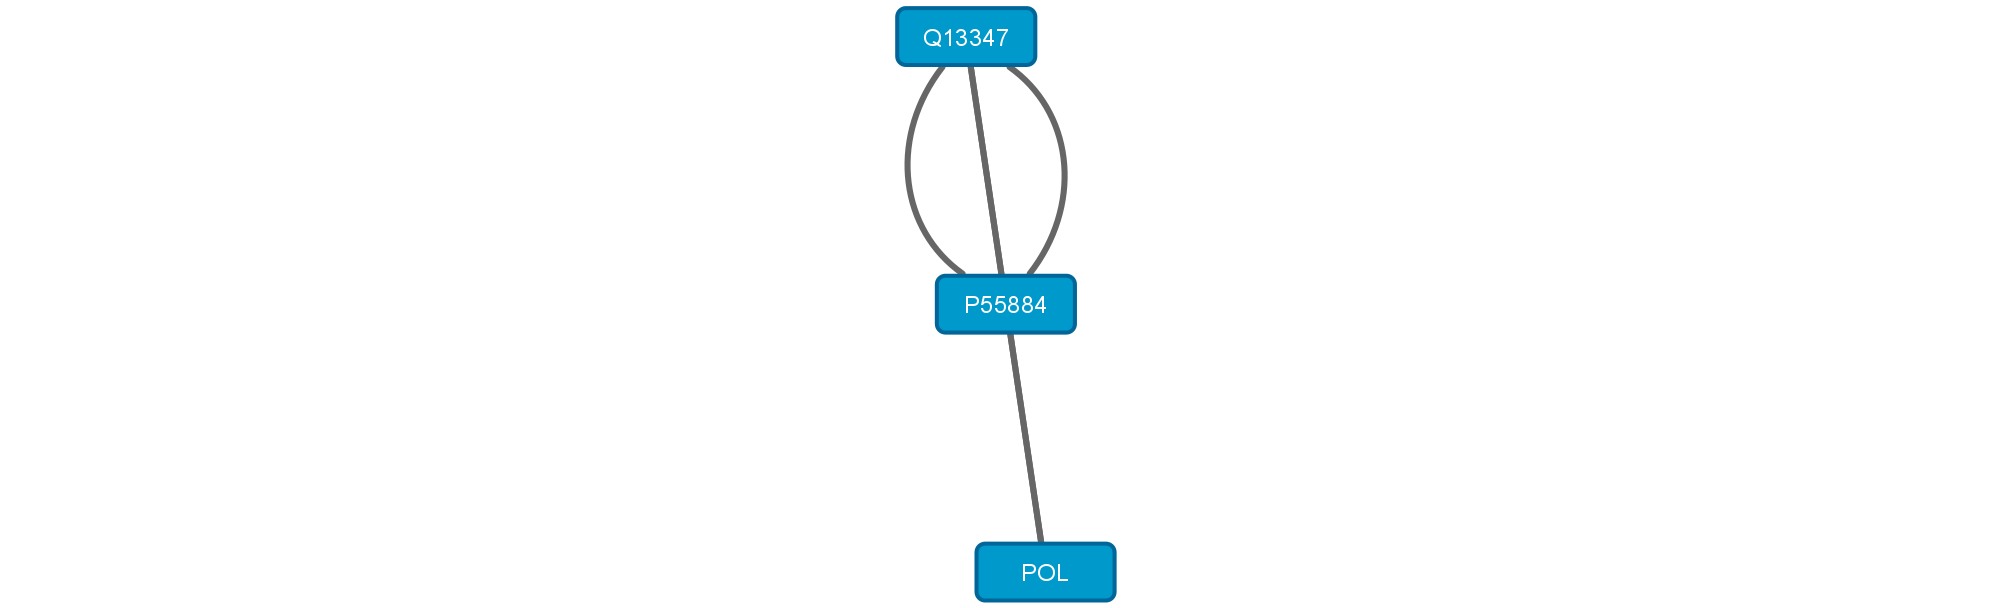

In [43]:
from IPython.display import Image, display
import os

if not os.path.exists('data'):  os.mkdir('data') # Prepare for .png files

clusters = []
list_of_images = []
for i in range(len(big_clusters)):
    start_view = time.monotonic()
    view_id = p4c.commands.commands_post('mcode view id=1 rank=' + str(i+1))
    print(f'{i} view took {(time.monotonic() - start_view):10.2f} seconds')

    start_append = time.monotonic()
    # Just for fun, show how to get a dataframe that is manipulated in Python. 
    clusters.append( p4c.tables.get_table_columns()
                      .drop(columns=['id','name','selected','MCODE::Clusters (1)','SUID'])
                      .sort_values(by=['MCODE::Score (1)'], ascending=False)
                      .reset_index(drop=True) )
    print(f'{i} append took {(time.monotonic() - start_append):10.2f} seconds')

    img_name = uuid.uuid4().hex
    start_export = time.monotonic()
    p4c.export_image(f'{img_name}')
    p4c.sandbox_get_from(f'{img_name}.png', f'{OUTPUT_DIR}{img_name}.png')
    p4c.sandbox_remove_file(f'{img_name}.png')
    print(f'{i} export took {(time.monotonic() - start_export):10.2f} seconds')
    list_of_images.append(f'{OUTPUT_DIR}{img_name}.png')
    
# Show all of the clusters
for image_name in list_of_images:
    display(Image(filename=image_name))